In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\riyaz\Downloads\C_Dataset_sample (2).xlsx")

In [3]:
df.head()

,Order_id,cafu_truck_id,Job_date,hourly_slot,fuel_id,vehicle_type_id,vehicle_brand_id,vehicle_model_id,litres_sold,amount_charged,minutes_late,Vehicle Type,Model,Brand
0,1003508625,19,2020-03-31,00:00 - 01:00,2,1,4,44.0,127.10,185.632977,0.00,Car,Q3,Audi
1,1003508626,32,2020-03-31,00:00 - 01:00,2,1,42,422.0,81.67,119.270473,0.00,Car,Wrangler Unlimited,Jeep
2,1003508627,24,2020-03-31,00:00 - 01:00,2,1,57,522.0,64.23,70.538414,0.00,Car,CX-9,Mazda
3,1003508628,6,2020-03-31,00:00 - 01:00,2,1,7,103.0,135.54,197.774878,75.88,Car,X1,BMW
4,1003508629,4,2020-03-31,00:00 - 01:00,2,1,7,106.0,114.51,174.338893,42.00,Car,X5,BMW


In [4]:
df.shape

(81068, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81068 entries, 0 to 81067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_id          81068 non-null  int64         
 1   cafu_truck_id     81068 non-null  int64         
 2   Job_date          81068 non-null  datetime64[ns]
 3   hourly_slot       81068 non-null  object        
 4   fuel_id           81068 non-null  int64         
 5   vehicle_type_id   81068 non-null  int64         
 6   vehicle_brand_id  81068 non-null  int64         
 7   vehicle_model_id  80118 non-null  float64       
 8   litres_sold       81068 non-null  float64       
 9   amount_charged    81068 non-null  float64       
 10  minutes_late      81068 non-null  float64       
 11  Vehicle Type      81068 non-null  object        
 12   Model            80118 non-null  object        
 13  Brand             81068 non-null  object        
dtypes: datetime64[ns](1), 

In [6]:
df.describe()

,Order_id,cafu_truck_id,fuel_id,vehicle_type_id,vehicle_brand_id,vehicle_model_id,litres_sold,amount_charged,minutes_late
count,8.106800e+04,81068.000000,81068.000000,81068.000000,81068.000000,80118.000000,81068.000000,81068.000000,81068.000000
mean,1.003500e+09,26.616988,1.647333,1.019243,101.787709,484.528321,125.800334,197.064567,3.552731
std,2.340246e+04,13.996099,0.496043,0.177217,463.605560,271.267176,49.353990,90.614877,12.696197
min,1.003459e+09,1.000000,1.000000,1.000000,1.000000,2.000000,4.690000,0.394704,0.000000
25%,1.003479e+09,15.000000,1.000000,1.000000,26.000000,276.000000,95.390000,140.182984,0.000000
50%,1.003500e+09,27.000000,2.000000,1.000000,48.000000,461.000000,122.985000,190.897852,0.000000
75%,1.003520e+09,39.000000,2.000000,1.000000,65.000000,660.000000,151.170000,244.737875,0.000000
max,1.003540e+09,50.000000,5.000000,4.000000,4152.000000,2720.000000,1619.640000,2897.435010,164.200000


In [7]:
df[df.dtypes[df.dtypes=='object'].index].describe()

,hourly_slot,Vehicle Type,Model,Brand
count,81068,81068,80118,81068
unique,24,4,716,91
top,12:00 - 13:00,Car,Patrol,Ford
freq,9088,79922,2986,8192


In [8]:
df.isnull().sum()

Order_id              0
cafu_truck_id         0
Job_date              0
hourly_slot           0
fuel_id               0
vehicle_type_id       0
vehicle_brand_id      0
vehicle_model_id    950
litres_sold           0
amount_charged        0
minutes_late          0
Vehicle Type          0
 Model              950
Brand                 0
dtype: int64

In [9]:
df.rename(columns = {'Vehicle Type':'vehicle_type'}, inplace = True)
  

In [10]:
df1=pd.read_excel(r"C:\Users\riyaz\Downloads\C_Dataset_sample (2).xlsx",sheet_name='Vehicle Type')

In [11]:
df1

,vehicle_type_id,name
0,1,Car
1,2,Boat
2,3,MotorBike
3,4,Other


# Revenue Analysis by Vehicle type 

In [12]:
df2=pd.DataFrame(df.groupby('vehicle_type')['amount_charged'].sum())

In [13]:
df2.reset_index(inplace=True)

In [14]:
df2

,vehicle_type,amount_charged
0,Boat,4.006655e+05
1,Car,1.553478e+07
2,MotorBike,2.537255e+04
3,Other,1.481232e+04


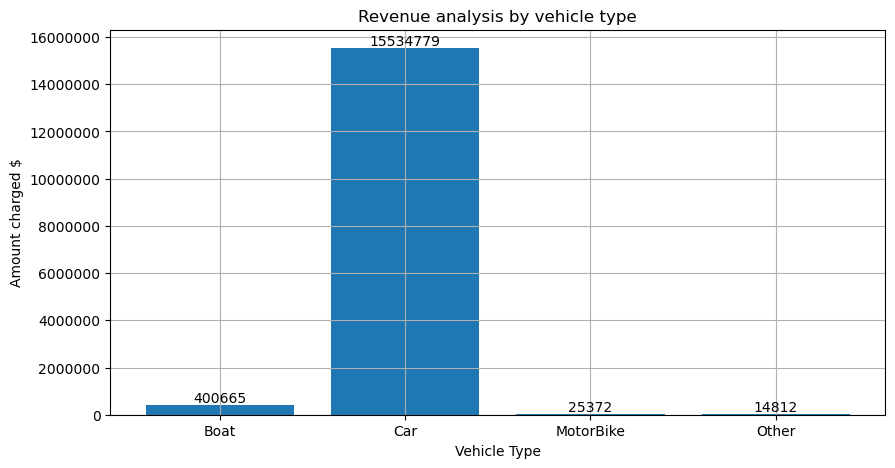

In [15]:
plt.figure(figsize=(10,5))
plt.bar(df2['vehicle_type'],df2['amount_charged'])

plt.xlabel('Vehicle Type')
plt.ylabel('Amount charged $')
plt.title('Revenue analysis by vehicle type')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
for i, amount in enumerate(df2['amount_charged']):
    label = str(int(amount))
    plt.text(i, amount, label, ha='center', va='bottom')
plt.show()

# Revenue analysis by brand 

In [16]:
df3=pd.DataFrame(df.groupby('Brand')['amount_charged'].sum().sort_values(ascending=False))

In [17]:
df3.reset_index(inplace=True)

In [18]:
df3

,Brand,amount_charged
0,Nissan,1.655122e+06
1,Ford,1.540322e+06
2,Toyota,1.440323e+06
3,Land Rover,1.143064e+06
4,Mercedes-Benz,9.747310e+05
...,...,...
86,Haval,1.537006e+02
87,INDIAN,1.377186e+02
88,ARCTIC CAT,1.181488e+02
89,BAJAJ,1.107825e+02


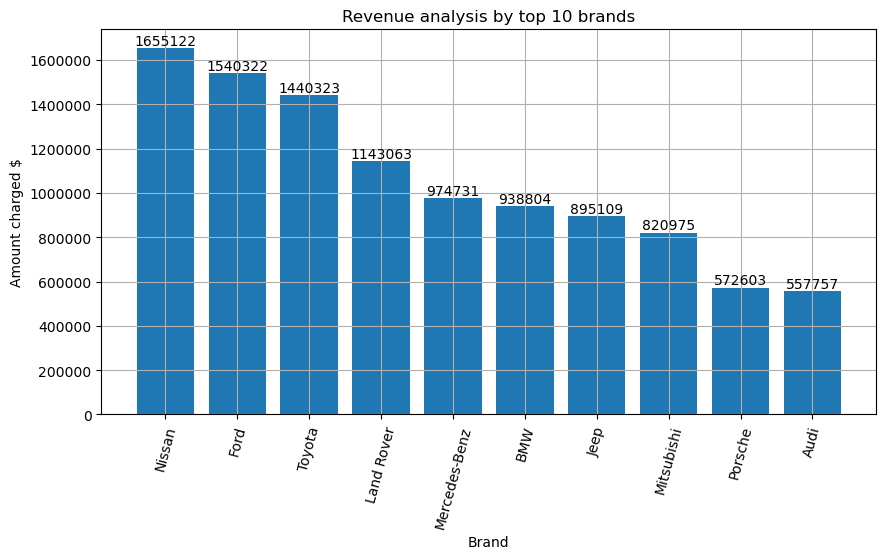

In [19]:
plt.figure(figsize=(10, 5))
top_10_brands = df3['Brand'][:10]
amounts = df3['amount_charged'][:10]

plt.bar(top_10_brands, amounts)

plt.xlabel('Brand')
plt.ylabel('Amount charged $')
plt.title('Revenue analysis by top 10 brands')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 75)
plt.grid()

# Loop through the bars and add integer labels
for i, amount in enumerate(amounts):
    label = str(int(amount))
    plt.text(i, amount, label, ha='center', va='bottom')

plt.show()

## # Revenue analysis by model 

In [20]:
df4=pd.read_excel(r"C:\Users\riyaz\Downloads\C_Dataset_sample (2).xlsx",sheet_name='Vehicle Model')

In [21]:
df5=df.merge(df4, left_on='vehicle_model_id', right_on='model_id', how='inner')

In [22]:
df5.head()

,Order_id,cafu_truck_id,Job_date,hourly_slot,fuel_id,vehicle_type_id,vehicle_brand_id,vehicle_model_id,litres_sold,amount_charged,minutes_late,vehicle_type,Model,Brand,model_id,model_name
0,1003508625,19,2020-03-31,00:00 - 01:00,2,1,4,44.0,127.10,185.632977,0.0,Car,Q3,Audi,44,Q3
1,1003508656,28,2020-03-31,00:00 - 01:00,2,1,4,44.0,198.10,329.435160,0.0,Car,Q3,Audi,44,Q3
2,1003508692,14,2020-03-31,01:00 - 02:00,2,1,4,44.0,108.77,158.811431,0.0,Car,Q3,Audi,44,Q3
3,1003508735,44,2020-03-31,01:00 - 02:00,2,1,4,44.0,107.77,144.725748,0.0,Car,Q3,Audi,44,Q3
4,1003507415,25,2020-03-30,08:00 - 09:00,1,1,4,44.0,119.09,193.586047,0.0,Car,Q3,Audi,44,Q3


In [23]:
df5[' Model'].unique()

array(['Q3', 'Wrangler Unlimited', 'CX-9', 'X1', 'X5', 'Montero Sport',
       'Explorer', 'LR3', 'Range Rover', '5-Series', 'Pajero',
       'Eclipse Cross', 'S-Class', 'Touareg', 'Mustang', '3-Series',
       'Edge', 'Cayenne', 'Escape', 'Accord Coupe', 'G 63 AMG', 'QX70',
       '3 Sedan', 'Compass', 'QX60', 'H3', 'Bentayga', 'Teramont',
       'Patrol', 'Land Cruiser Prado', 'Corolla', 'Sportage', 'Q7', 'X6',
       '7-Series', 'Jetta', 'QX80', 'Nitro', 'F-150', 'Sunny', 'Fortuner',
       'Sentra', 'GLE-Class Coupe', 'Pajero SWB', 'Land Cruiser', 'RAV-4',
       'M3 Convertible', 'Q5', 'Altima', 'Urvan', 'LX', 'i10', 'Wrangler',
       'Pathfinder', 'X-Trail', 'LR4', 'Cayman', 'Kicks', 'A6',
       'Escalade', 'Charger', 'Juke', 'Challenger', 'Koleos', 'Ram',
       'Silverado', 'Grand Cherokee', 'E 55 AMG', 'Optima', 'Rio',
       'Durango', 'Tiguan', 'Hiace', 'Xterra', 'E-Class', 500, 'XF',
       'Cooper', 'C-Class', 'G-Class', 'Outlander', 'MKX',
       'Range Rover Evoque', '

In [24]:
df5.drop(columns=['vehicle_model_id','model_name'],axis=1,inplace=True)

In [25]:
df5.head()

,Order_id,cafu_truck_id,Job_date,hourly_slot,fuel_id,vehicle_type_id,vehicle_brand_id,litres_sold,amount_charged,minutes_late,vehicle_type,Model,Brand,model_id
0,1003508625,19,2020-03-31,00:00 - 01:00,2,1,4,127.10,185.632977,0.0,Car,Q3,Audi,44
1,1003508656,28,2020-03-31,00:00 - 01:00,2,1,4,198.10,329.435160,0.0,Car,Q3,Audi,44
2,1003508692,14,2020-03-31,01:00 - 02:00,2,1,4,108.77,158.811431,0.0,Car,Q3,Audi,44
3,1003508735,44,2020-03-31,01:00 - 02:00,2,1,4,107.77,144.725748,0.0,Car,Q3,Audi,44
4,1003507415,25,2020-03-30,08:00 - 09:00,1,1,4,119.09,193.586047,0.0,Car,Q3,Audi,44


In [26]:
df6=pd.DataFrame(df5.groupby(' Model')['amount_charged'].sum().sort_values(ascending=False))
df6.reset_index(inplace=True)


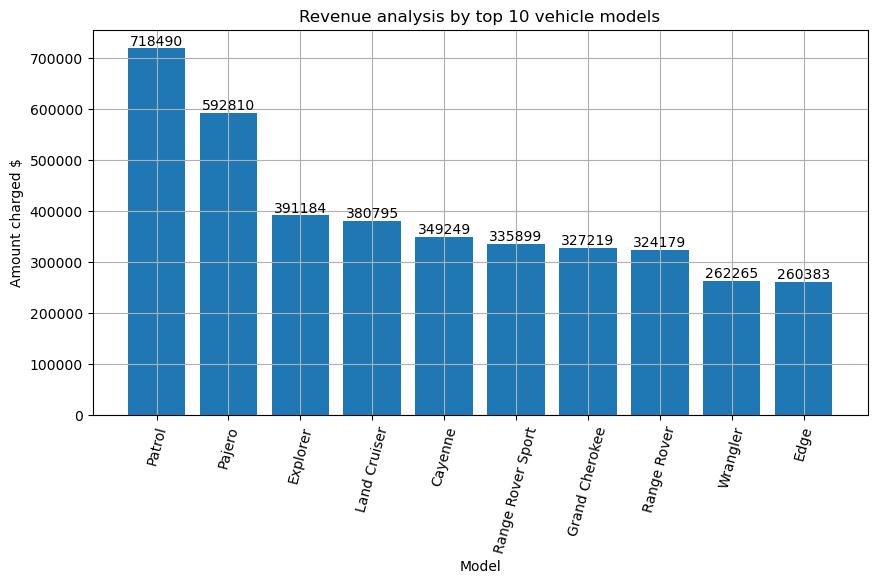

In [29]:
plt.figure(figsize=(10, 5))
top_10_models = df6[' Model'][:10]
amounts = df6['amount_charged'][:10]

plt.bar(top_10_models, amounts)

plt.xlabel('Model')
plt.ylabel('Amount charged $')
plt.title('Revenue analysis by top 10 vehicle models')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=75)
plt.grid()

# Loop through the bars and add integer labels
for i, amount in enumerate(amounts):
    label = str(int(amount))
    plt.text(i, amount, label, ha='center', va='bottom')

plt.show()


# Delay analysis by weekday 

In [46]:
df['weekday']=df['Job_date'].dt.weekday

In [47]:
df['weekday']

0        1
1        1
2        1
3        1
4        1
        ..
81063    6
81064    6
81065    6
81066    6
81067    6
Name: weekday, Length: 81068, dtype: int64

In [93]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(df.shape[0]):
    df['weekday'][i]=days[df['Job_date'][i].weekday()]
    

C:\Users\riyaz\AppData\Local\Temp\ipykernel_61244\451893630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'][i]=days[df['Job_date'][i].weekday()]


In [94]:
df['weekday']

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
81063     Sunday
81064     Sunday
81065     Sunday
81066     Sunday
81067     Sunday
Name: weekday, Length: 81068, dtype: object

In [100]:
df8=pd.DataFrame(df.groupby('weekday')['minutes_late'].mean().sort_values(ascending=False))
df8.reset_index(inplace=True)

In [101]:
df8

,weekday,minutes_late
0,Tuesday,3.919146
1,Monday,3.756589
2,Sunday,3.706768
3,Friday,3.548883
4,Thursday,3.369228
5,Saturday,3.321121
6,Wednesday,3.078654


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

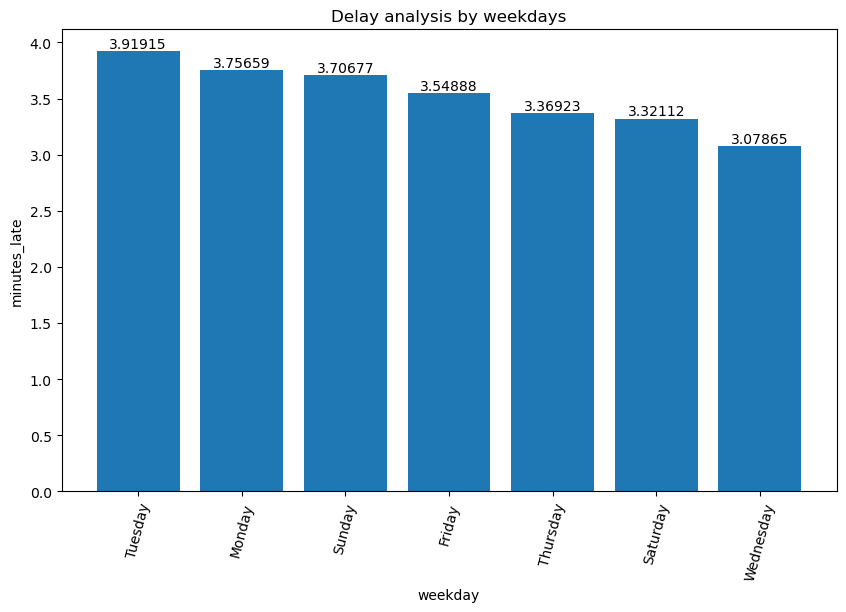

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
bar_container = ax.bar(df8['weekday'],df8['minutes_late'])
ax.set(ylabel='minutes_late',xlabel='weekday', title='Delay analysis by weekdays')
ax.bar_label(bar_container)
plt.xticks(rotation=75)

# Delay anaysis by hourly slot

In [61]:
df['hourly_slot']


0        00:00 - 01:00
1        00:00 - 01:00
2        00:00 - 01:00
3        00:00 - 01:00
4        00:00 - 01:00
             ...      
81063    23:00 - 00:00
81064    23:00 - 00:00
81065    23:00 - 00:00
81066    23:00 - 00:00
81067    23:00 - 00:00
Name: hourly_slot, Length: 81068, dtype: object

In [69]:
# Split the string into two parts: start time and end time
df['start_time'], df['end_time'] = df['hourly_slot'].str.split(' - ').str

# Convert the start time to datetime format
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M')

# Convert the end time to datetime format
df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M')

# Format the datetime objects in 12-hour format 
df['start_time_12hr'] = df['start_time'].dt.strftime('%I:%M')
df['end_time_12hr'] = df['end_time'].dt.strftime('%I:%M')

# Create the 12-hour format time range
df['hourly_slot_12hr'] = df['start_time_12hr'] + ' - ' + df['end_time_12hr']


C:\Users\riyaz\AppData\Local\Temp\ipykernel_61244\4003552576.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['start_time'], df['end_time'] = df['hourly_slot'].str.split(' - ').str


In [70]:
df['hourly_slot_12hr']

0        12:00 - 01:00
1        12:00 - 01:00
2        12:00 - 01:00
3        12:00 - 01:00
4        12:00 - 01:00
             ...      
81063    11:00 - 12:00
81064    11:00 - 12:00
81065    11:00 - 12:00
81066    11:00 - 12:00
81067    11:00 - 12:00
Name: hourly_slot_12hr, Length: 81068, dtype: object

In [76]:
delay_by_hr=df.groupby('hourly_slot_12hr').sum()[['minutes_late']].sort_values(by='minutes_late',ascending=False)

In [77]:
delay_by_hr.reset_index(inplace=True)

In [78]:
delay_by_hr

,hourly_slot_12hr,minutes_late
0,12:00 - 01:00,36823.12
1,10:00 - 11:00,32690.22
2,02:00 - 03:00,30431.78
3,01:00 - 02:00,28088.36
4,09:00 - 10:00,25833.14
5,08:00 - 09:00,23040.06
6,03:00 - 04:00,21980.44
7,04:00 - 05:00,19977.20
8,11:00 - 12:00,18576.48
9,07:00 - 08:00,18487.08


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

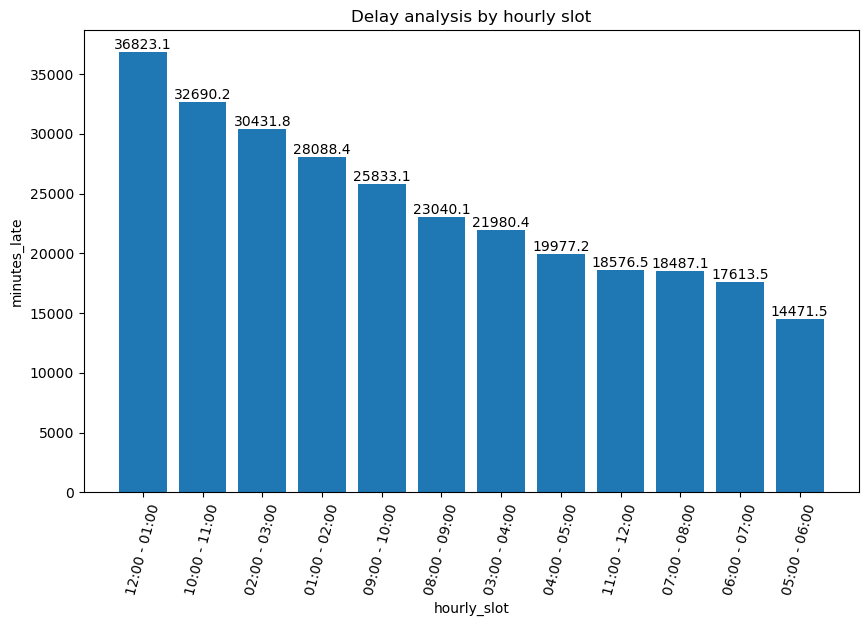

In [92]:
fig, ax = plt.subplots(figsize=(10,6))
bar_container = ax.bar(delay_by_hr['hourly_slot_12hr'],delay_by_hr['minutes_late'])
ax.set(ylabel='minutes_late',xlabel='hourly_slot', title='Delay analysis by hourly slot')
ax.bar_label(bar_container)
plt.xticks(rotation=75)

# Delay anaysis by vehicle type

In [112]:
df9=pd.DataFrame(df.groupby('vehicle_type')['minutes_late'].mean().sort_values(ascending=False))
df9.reset_index(inplace=True)


In [113]:
df9

,vehicle_type,minutes_late
0,MotorBike,5.791150
1,Car,3.577580
2,Boat,0.940266
3,Other,0.000000


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

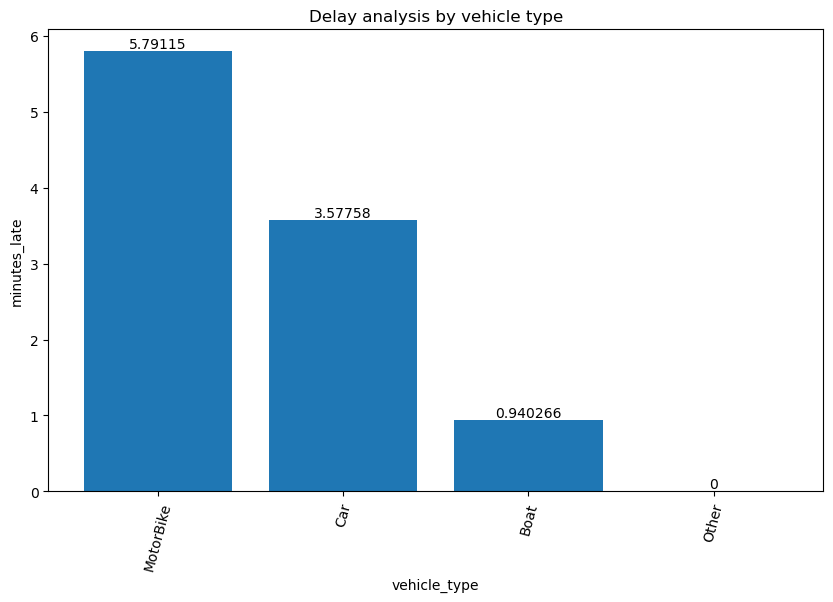

In [115]:
fig,ax=plt.subplots(figsize=(10,6))
bar_container=ax.bar(df9['vehicle_type'],df9['minutes_late'])
ax.set(ylabel='minutes_late',xlabel='vehicle_type',title='Delay analysis by vehicle type')
ax.bar_label(bar_container)
plt.xticks(rotation=75)


# Peak hourly slot analysis-by number of orders

In [119]:
df10=pd.DataFrame(df.groupby('hourly_slot_12hr')['Order_id'].count().sort_values(ascending=False))
df10.reset_index(inplace=True)

In [120]:
df10

,hourly_slot_12hr,Order_id
0,12:00 - 01:00,11260
1,01:00 - 02:00,9652
2,02:00 - 03:00,8936
3,10:00 - 11:00,7368
4,03:00 - 04:00,7168
5,04:00 - 05:00,5882
6,09:00 - 10:00,5822
7,08:00 - 09:00,5130
8,07:00 - 08:00,5076
9,11:00 - 12:00,5044


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

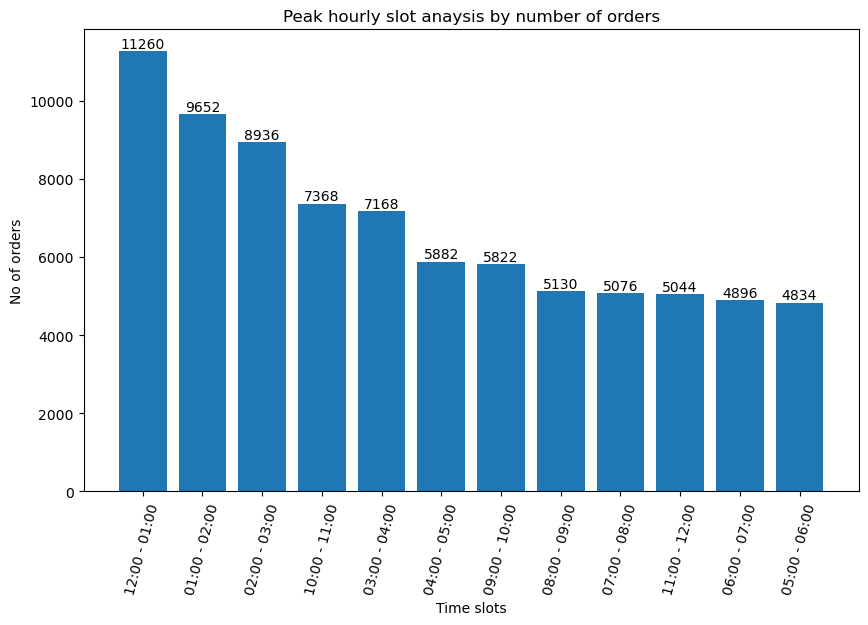

In [121]:
fig,ax=plt.subplots(figsize=(10,6))
bar_container=ax.bar(df10['hourly_slot_12hr'],df10['Order_id'])
ax.set(ylabel='No of orders',xlabel='Time slots',title='Peak hourly slot anaysis by number of orders')
ax.bar_label(bar_container)
plt.xticks(rotation=75)

# No missing values in the data

# Checking for outliers in data

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    sns.boxplot(df)

    return outliers



outliers = find_outliers_IQR(df[' Model'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))